In [62]:
%pylab inline
import sqlite3,copy,gc,os,random
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
import multiprocessing as mp
import time
import scipy,collections

matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/sn0wfree/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

In [17]:
def detectedHDFTable(HDFfile_path):
    #'share.h5'
    with pd.HDFStore(HDFfile_path) as share:
        return share.keys()

In [4]:
detectedHDFTable('share.h5')

['/share', '/share_with_BGgroup', '/share_with_gsGroup']

In [4]:
share =pd.read_hdf('share.h5','share')
share_with_BGgroup=pd.read_hdf('share.h5','share_with_BGgroup')
share_with_gsGroup=pd.read_hdf('share.h5','share_with_gsGroup')
Google=pd.read_hdf('/Users/sn0wfree/Documents/python_projects/data_collection/API/profit/database/h5/GS.h5')
Google['date']=pd.to_datetime(Google['date'],format ='%Y%m%d')


In [11]:

share_with_gsGroup =share_with_gsGroup[[u'TICKER', u'PRC', u'SHROUT', u'RET', u'MarketValue']]

In [21]:

ww=[]
#for ticker in list(set(Google.columns)&set(share_with_gsGroup.TICKER)):
def eeeee(ticker):
    w= Google[['date',ticker]]
    w.columns =['date','GoogleSearch']
    w['TICKER']=ticker
    return w
for ticker in list(Google.columns)[1:]:
    w= Google[['date',ticker]]
    w.columns =['date','GoogleSearch']
    w['TICKER']=ticker
    ww.append(w)
gggggggg =pd.concat(ww)    

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [33]:
#gggggggg.GoogleSearch =pd.to_numeric(gggggggg.GoogleSearch,errors='coerce')
#gggggggg=gggggggg.dropna()
gggggggg
share_with_gsGroup=share_with_gsGroup.reset_index()
share_with_gs =pd.merge(share_with_gsGroup,gggggggg,on=['date','TICKER'])
#share_with_gs=share_with_gs.set_index('date')
#share_with_gs.GoogleSearch =pd.to_numeric(share_with_gs.GoogleSearch)

#share_with_gs.GoogleSearch[2666213]
#share_with_gs =share_with_gs.dropna()
#share_with_gs =share_with_gs.reset_index()
#share_with_gs =share_with_gs[[u'date', u'TICKER', u'PRC', u'SHROUT', u'RET', u'MarketValue', u'GoogleSearch']]



In [42]:

share_with_gs.to_csv('share_with_gs.csv')

,date,TICKER,PRC,SHROUT,RET,MarketValue,GoogleSearch
0,2004-01-02,A,28.800,476149,-0.015048,1.371309e+07,62.0
1,2004-01-05,A,29.550,476149,0.026042,1.407020e+07,65.0
2,2004-01-06,A,30.480,476149,0.031472,1.451302e+07,78.0
3,2004-01-07,A,30.870,476149,0.012795,1.469872e+07,88.0
4,2004-01-08,A,32.280,476149,0.045675,1.537009e+07,76.0
5,2004-01-09,A,32.050,476149,-0.007125,1.526058e+07,73.0
6,2004-01-12,A,32.400,476149,0.010921,1.542723e+07,86.0
7,2004-01-13,A,32.240,476149,-0.004938,1.535104e+07,79.0
8,2004-01-14,A,32.140,476149,-0.003102,1.530343e+07,85.0
9,2004-01-15,A,32.910,476149,0.023958,1.567006e+07,95.0


In [43]:
GS_period ={0:('2004-01-01', '2004-08-31'),
 1:('2004-09-01', '2005-04-30'),
 2:('2005-05-01', '2005-12-31'),
 3:('2006-01-01', '2006-08-31'),
 4:('2006-09-01', '2007-04-30'),
 5:('2007-05-01', '2007-12-31'),
 6:('2008-01-01', '2008-08-31'),
 7:('2008-09-01', '2009-04-30'),
 8:('2009-05-01', '2009-12-31'),
 9:('2010-01-01', '2010-08-31'),
 10:('2010-09-01', '2011-04-30'),
 11:('2011-05-01', '2011-12-31'),
 12:('2012-01-01', '2012-08-31'),
 13:('2012-09-01', '2013-04-30'),
 14:('2013-05-01', '2013-12-31'),
 15:('2014-01-01', '2014-08-31'),
 16:('2014-09-01', '2015-04-30'),
 17:('2015-05-01', '2015-12-31'),
 18:('2016-01-01', '2016-08-31'),
 19:('2016-09-01', '2016-12-31')}
r=[]
for period_target,period_duration in GS_period.items():
    locals()['period%d'%period_target] = share_with_gs[(share_with_gs.date<=period_duration[1]) &  (share_with_gs.date>=period_duration[0])]
    locals()['period%d'%period_target]['Period']=period_target
    r.append(locals()['period%d'%period_target])
rr =pd.concat(r).set_index('date')


/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [544]:
#rr.to_hdf('ShareWithGoogleSearchIndex.h5','ShareWithGoogleSearchIndex')



#rr['date']=pd.to_datetime(rr['date'],format='%d%m%Y')
#rr['date'] =rr['date'].dt.strftime('%Y%m%d')
rr.to_hdf('temp.h5','temp')
    
#ShareWithGoogleSearchIndex=pd.concat(te)    
        
    

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1282: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['date', 'TICKER', 'RET']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [308]:
def gg(rr,status,chunk,period,defualt ='GoogleSearch'):
    
    vwrt =[pd.DataFrame({date:pd.Series(GroupChunk(date_df,chunk,defualt,status))}).T for date,date_df in rr.groupby('date')]
    gsvwrt =pd.concat(vwrt)
    gsvwrt.index =pd.to_datetime(gsvwrt.index,format='%Y%m%d')
    #gsvwrt =gsvwrt.join(period)
    return gsvwrt
    
#period


In [365]:

#
bggroup =pd.merge(rrt,sbg,on=['date','TICKER'])
bggroup['date'] =bggroup['date'].dt.strftime('%Y%m%d')
#bggroup['date'] =pd.to_datetime(bggroup['date'] ,format='%Y%m%d')
#bggroup =bggroup.set_index('date')
#bggroup=bggroup.reset_index()

In [388]:
#bggroup =pd.merge(rrt,sbg,on=['date','TICKER'])
#for i in index:
    #locals()['bg%s'%i] =pd.concat([gg(ss,i,10,period,defualt='NEWS_HEAT_READ_DAVG') for Period,ss in bggroup.groupby('date')])
    #locals()['gs%s'%i]=locals()['gs%s'%i].join(period)
    #share_with_BGgroup
#bggroup=bggroup.dropna()
s=[]
#:
#    try:
for i in index:
    locals()['bg%s'%i] =[]
    for Period,ss in bggroup.groupby('date'):
        try:
            locals()['bg%s'%i].append(gg(ss,i,10,period,defualt='NEWS_HEAT_READ_DAVG')) 
        except Exception as e:
            pass
    locals()['bg%s'%i] =pd.concat(locals()['bg%s'%i])       
#        print e
#        print ss.SHROUT.sum()
    
#bggroup[bggroup['date']=='20130123']   


#sbg =share_with_BGgroup[['TICKER','NEWS_HEAT_READ_DAVG']].reset_index()    
#rrt = rrr[['date','TICKER','PRC','SHROUT','RET','MarketValue']]
#rrt['date']=pd.to_datetime(rrt['date'],format='%Y%m%d')
print (bgvwrtPRC.diff()/bgvwrtPRC.shift()).describe()

In [465]:
#print cal(bgvwrtPRC),cal(bgewrtPRC)
#
dfcolumns =[(u'Group0','PRC'), (u'Group1','PRC'), (u'Group2','PRC'), (u'Group3','PRC'), (u'Group4','PRC'),(u'Group5','PRC'), (u'Group6','PRC'), (u'Group7','PRC'), (u'Group8','PRC'), (u'Group9','PRC'),(u'Period','PRC')]


(u'Group0','PRC') in gsvwrtPRC.columns

#print zip(gsvwrtPRC.columns,['PRC']*gsvwrtPRC.shape[1])
#print pd.MultiIndex.from_tuples(zip(gsvwrtPRC.columns,['PRC']*gsvwrtPRC.shape[1]),names=['Group', 'Variable'])

#cal(gsewrtPRC)
#gsewrtPRC.columns=pd.MultiIndex.from_tuples(dfcolumns,names=['Group', 'Variable'])
(u'Group0','PRC') in gsewrtPRC.columns
cal(bgewrtPRC).to_hdf('regression_data_csv/result.h5','bgewrtPRC')
cal(bgvwrtPRC).to_hdf('regression_data_csv/result.h5','bgvwrtPRC')
cal(gsewrtPRC).to_hdf('regression_data_csv/result.h5','gsewrtPRC')
cal(gsvwrtPRC).to_hdf('regression_data_csv/result.h5','gsvwrtPRC')

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis0_level0] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_items_level0] [items->None]

  f = lambda store: store.put(key, value, **kwargs)
/Users/sn0wfree/anaconda/lib/python2.7/site-packages/pandas/io/pytables.py:262: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_items_level0] [items->None]

  f = lambda store: store.put(key, value, **kwargs)


In [16]:
print detectedHDFTable('regroup.GS.h5')
print detectedHDFTable('regroup.BG.h5')

#bgvwrtPRC.columns=group_multicolumns

def cal(bgvwrtPRC):
    dfcolumn =[(u'Group0','PRC'), (u'Group1','PRC'), (u'Group2','PRC'), (u'Group3','PRC'), (u'Group4','PRC'),(u'Group5','PRC'), (u'Group6','PRC'), (u'Group7','PRC'), (u'Group8','PRC'), (u'Group9','PRC')]
    if (u'Group0','PRC') not in bgvwrtPRC.columns:
        bgvwrtPRC.columns=pd.MultiIndex.from_tuples(zip(bgvwrtPRC.columns,['PRC']*bgvwrtPRC.shape[1]),names=['Group', 'Variable'])
    else:
        pass


    ma_list = [5,10, 20,30,50, 60,100,200]
    if ('TBill1Mo','PRC') not in bgvwrtPRC.columns:
        bgvwrtPRC =bgvwrtPRC.join(otherfactor)
    else:
        pass
    for col in dfcolumn:
        bgvwrtPRC[(col[0],'RETrate')] = (bgvwrtPRC[col].diff()/bgvwrtPRC[col].shift(1))
        for ma in ma_list:
            bgvwrtPRC[(col[0],'MA_' + str(ma))] = bgvwrtPRC[col].rolling(window=ma,center=False).mean()
            temp = bgvwrtPRC[col] -bgvwrtPRC[col[0],'MA_'+str(ma)]
            bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)]=[1 if r>0 else 0 for r in temp]
        #GS[group[0],'MA%stiming'%ma] =GS[group[0],'RETrate'].shift(1)*GS[group[0],'buysignalforMA%s'%ma]+GS['TBill1Mo','PRC'].shift(1)*(1-GS[group[0],'buysignalforMA%s'%ma])
            bgvwrtPRC[col[0],'MA%stiming'%str(ma)] =bgvwrtPRC[col[0],'RETrate']*bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)]+bgvwrtPRC['TBill1Mo','PRC']*(1-bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)])
            bgvwrtPRC[col[0],'MAP%s'%str(ma)] =bgvwrtPRC[col[0],'MA%stiming'%str(ma)]-bgvwrtPRC[col[0],'RETrate']
            bgvwrtPRC[col[0],'MAP%s_dummy'%str(ma)] =[1 if n>0 else 0 for n in bgvwrtPRC[col[0],'MAP%s'%str(ma)]]
    return bgvwrtPRC


NameError: name 'detectedHDFTable' is not defined

In [287]:
index =['vwrtPRC','ewrtPRC','MarketValue','SHROUT']
G_group=[  u'Group0',   u'Group1',   u'Group2',   u'Group3',   u'Group4']
G_group2=[  u'Group0',   u'Group1',   u'Group2',   u'Group3',   u'Group4',u'Group5',   u'Group6',   u'Group7',   u'Group8',   u'Group9']


rrr=rr[(True-rr['TICKER'].isin(['A','AA','ARE','Y','Z','AND','W','X','D','V','F']))]  

#period.to_csv('gsperiod.csv')
for i in index:
    locals()['gs%s'%i] =pd.concat([gg(ss,i,10,period) for Period,ss in rrr.groupby('Period')])
    locals()['gs%s'%i]=locals()['gs%s'%i].join(period)
#gsewrt=gg(rr,'ewrtPRC',10,period)



In [6]:
gsvwrtPRC

Group          Group0     Group1     Group2     Group3     Group4     Group5  \
Variable          PRC        PRC        PRC        PRC        PRC        PRC   
2004-01-02  33.487310  37.445108  29.539758  35.568475  33.063421  31.783365   
2004-01-05  28.842561  38.505946  29.915238  37.470245  30.739065  32.346214   
2004-01-06  38.819854  29.866172  34.602825  36.687491  35.117314  29.419619   
2004-01-07  42.419372  32.044771  28.675071  37.275353  35.089105  30.079979   
2004-01-08  32.137691  35.037167  33.465162  38.047764  32.251555  30.838800   
2004-01-09  35.288612  35.099293  31.386802  33.706393  34.135172  30.068900   
2004-01-12  34.324963  35.106172  30.127979  37.770090  30.121416  36.281239   
2004-01-13  33.974559  33.602053  33.305339  37.371395  32.611209  28.934918   
2004-01-14  31.445305  37.902483  29.015272  38.610510  32.900289  30.020248   
2004-01-15  33.655814  36.632227  30.186987  36.459474  35.043262  30.330980   
2004-01-16  32.832892  35.923665  31.698941  39.387331  32.119896  32.601234   
2004-01-20  32.812372  32.506305  33.429591  37.366139  31.024912  31.775695   
2004-01-21  32.718278  35.114622  35.914494  39.149937  32.927833  29.715502   
2004-01-22  35.489146  27.835148  33.829136  38.006660  33.412811  30.531389   
2004-01-23  37.906450  31.946858  34.017791  36.891255  29.258562  33.367050   
2004-01-26  33.154187  34.117025  30.297133  37.819402  35.899427  29.985497   
2004-01-27  34.319940  32.707928  28.483492  38.189654  37.310671  30.805160   
2004-01-28  45.763420  34.604179  28.360065  37.051262  35.073364  29.703204   
2004-01-29  34.895231  37.089301  28.627687  37.219015  31.017026  35.045748   
2004-01-30  32.766215  36.465078  30.036264  37.046089  33.084765  31.264745   
2004-02-02  35.183498  33.145882  33.341447  38.378572  32.879255  32.714113   
2004-02-03  34.993897  35.968577  28.636975  35.671968  34.563447  31.216738   
2004-02-04  44.765642  32.778309  34.104148  37.109933  28.888699  34.554562   
2004-02-05  36.452262  35.611125  32.223711  37.870645  33.515559  30.000466   
2004-02-06  38.050468  33.138519  34.451271  37.106106  33.579246  30.490407   
2004-02-09  32.308005  34.165008  34.281245  37.730446  32.397249  32.794631   
2004-02-10  34.104168  37.668403  29.011086  39.402623  32.417347  33.835278   
2004-02-11  33.678190  36.721094  36.087726  34.212517  34.167788  30.707466   
2004-02-12  32.012577  37.482242  34.951618  38.426794  35.411336  27.495608   
2004-02-13  36.311764  30.584059  36.226440  35.956797  35.103382  30.733891   
...               ...        ...        ...        ...        ...        ...   
2016-11-17  34.711151  37.567743  38.758655  54.298116  48.379206  54.053906   
2016-11-18  31.326070  31.595746  37.942816  54.508404  51.217373  59.604464   
2016-11-21  36.439837  37.775398  40.648032  55.824293  51.918984  56.677741   
2016-11-22  36.801088  39.756930  40.840360  55.206708  44.593225  56.399445   
2016-11-23  41.666895  36.747402  34.227921  59.264663  51.789386  49.743707   
2016-11-25  37.661168  41.677588  34.736924  49.115081  57.945335  52.546922   
2016-11-28  39.666983  35.570931  41.380677  59.593076  49.892278  53.365469   
2016-11-29  31.788261  33.756071  39.621004  56.579886  49.314400  58.367363   
2016-11-30  33.503251  40.681770  35.174651  56.527028  56.733619  45.492402   
2016-12-01  32.571670  32.671689  39.762324  53.152524  46.932975  52.576864   
2016-12-02  35.637237  36.408722  40.904515  50.943759  52.469866  52.429520   
2016-12-05  39.463356  32.551365  41.780747  55.270308  48.238426  45.702149   
2016-12-06  38.374979  33.987914  34.075228  56.538831  54.452242  53.667083   
2016-12-07  46.008362  35.499364  33.478034  56.060348  47.368118  62.866901   
2016-12-08  35.630095  36.808674  38.254806  58.400996  56.533540  54.380123   
2016-12-09  44.703133  40.801046  31.955712  57.101532  47.977240  57.478764   
2016-12-12  43.831842  40.455659  35.855357  54.079609  56.707271  52.541268   


In [9]:
#set(rrr.TICKER)

#set(rrr.sort_values('TICKER').TICKER)

#adjustgsewrt,dict_gsewrt=adjustprice(gsewrtPRC,'Period')
#print (adjustgsvwrt[G_group2].diff()/adjustgsvwrt[G_group2].shift(1)).describe()
#(gsvwrt.diff()/gsvwrt).describe()
#print (adjustgsewrt.diff()/adjustgsewrt.shift(1)).describe()
#print (gsewrtPRC.diff()/gsewrtPRC.shift(1)).describe()
#(gsewrtPRC.diff()/gsewrtPRC.shift(1)).mean().plot()
#gsewrtPRC
#print (gsvwrtPRC.diff()/gsvwrtPRC.shift(1)).describe()

print (bgvwrtPRC.diff()/bgvwrtPRC.shift(1)).describe()



Group          Group0       Group1       Group2       Group3       Group4  \
Variable          PRC          PRC          PRC          PRC          PRC   
count     1651.000000  1651.000000  1651.000000  1651.000000  1651.000000   
mean         0.003565     0.003758     0.004722     0.006122     0.006087   
std          0.080782     0.088694     0.102800     0.111726     0.112781   
min         -0.216317    -0.380494    -0.838778    -0.408348    -0.543582   
25%         -0.051251    -0.050727    -0.041452    -0.051790    -0.051429   
50%         -0.000657    -0.000808    -0.000530     0.000600     0.000287   
75%          0.054418     0.052883     0.042913     0.057034     0.053172   
max          0.450321     1.296821     2.505964     0.743570     0.965484   

Group          Group5       Group6       Group7       Group8       Group9  \
Variable          PRC          PRC          PRC          PRC          PRC   
count     1651.000000  1651.000000  1651.000000  1651.000000  1651.000000  

In [304]:
gsewrtPRC.to_hdf('regroup.GS.h5','gsewrtPRC')
gsvwrtPRC.to_hdf('regroup.GS.h5','gsvwrtPRC')
gsMarketValue.to_hdf('regroup.GS.h5','gsMarketValue')
gsSHROUT.to_hdf('regroup.GS.h5','gsSHROUT')
bgewrtPRC.to_hdf('regroup.BG.h5','bgewrtPRC')
bgvwrtPRC.to_hdf('regroup.BG.h5','bgvwrtPRC')
bgMarketValue.to_hdf('regroup.BG.h5','bgMarketValue')
bgSHROUT.to_hdf('regroup.BG.h5','bgSHROUT')

In [11]:
#group_multicolumns=pd.MultiIndex.from_tuples([  ('Group0','PRC'), (u'Group1','PRC'), (u'Group2','PRC'), (u'Group3','PRC'), (u'Group4','PRC'),(u'Group5','PRC'), (u'Group6','PRC'), (u'Group7','PRC'), (u'Group8','PRC'), (u'Group9','PRC')],names=['Group', 'Variable'])

dfcolumn =[('Group0','PRC'), (u'Group1','PRC'), (u'Group2','PRC'), (u'Group3','PRC'), (u'Group4','PRC'),(u'Group5','PRC'), (u'Group6','PRC'), (u'Group7','PRC'), (u'Group8','PRC'), (u'Group9','PRC')]


In [415]:
#pd.MultiIndex.from_tuples(('vwrtPRC','ewrtPRC','MarketValue','SHROUT'), names=['first', 'second']
#ShareWithGoogleSearchIndex.sort_index()

#

otherfactor =pd.read_hdf('PriceAdjustedGroup.h5','GSwithfactor')[['TBill1Mo','MktRF','SMB','HML']]

otherfactor.columns =pd.MultiIndex.from_tuples([('TBill1Mo','PRC'),('MktRF','PRC'),('SMB','PRC'),('HML','PRC')])


In [ ]:
#for period,df in rr.groupby('period'):

    
 

/Users/sn0wfree/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [272]:
bgewrtPRC=pd.read_csv('bgewrtPRC.csv')



In [276]:

del bgewrtPRC.iloc[0]

AttributeError: __delitem__

In [236]:
adjust_price={}
#rr=rr.sort_index()  
def adjustprice(rr,periods):
    
    for period,df in rr.groupby(periods):

        if period == 0:
            base=0
            div=[1]*df.shape[1]
            last_period_price=df.iloc[-1]
            df=df/div

        else:
            base =period-1
            #print base
            div = df.iloc[0]/adjust_price[base]['last_period_price']
            last_period_price =df.iloc[-1]/div
            df=df/div
        adjust_price.update({period:{'df':df,'base':base,'div':div,'last_period_price':last_period_price}})

    GS_adjusted =pd.concat([ v['df'] for v in adjust_price.values()]).sort_index()
    return GS_adjusted,adjust_price
#GS_adjusted_withFactors=GS_adjusted.join(otherfactor[['MktRF','SMB','HML','TBill1Mo']])
#GS_adjusted_withFactors.to_hdf('PriceAdjustedGroup.h5','GSwithfactor')



In [ ]:
adjust_price={}
rr=rr.sort_index()  
for period,df in rr.groupby('period'):
    
    if period == 0:
        base=0
        div=[1]*df.shape[1]
        last_period_price=df.iloc[-1]
        df=df/div
        
    else:
        base =period-1
        print base
        div = df.iloc[0]/adjust_price[base]['last_period_price']
        last_period_price =df.iloc[-1]/div
        df=df/div
    adjust_price.update({period:{'df':df,'base':base,'div':div,'last_period_price':last_period_price}})

GS_adjusted =pd.concat([ v['df'] for v in adjust_price.values()]).sort_index()
GS_adjusted_withFactors=GS_adjusted.join(otherfactor[['MktRF','SMB','HML','TBill1Mo']])
GS_adjusted_withFactors.to_hdf('PriceAdjustedGroup.h5','GSwithfactor')

In [4]:
bgewrtPRC=pd.read_hdf('regression_data_csv/result.h5','bgewrtPRC')
bgvwrtPRC=pd.read_hdf('regression_data_csv/result.h5','bgvwrtPRC')
gsewrtPRC=pd.read_hdf('regression_data_csv/result.h5','gsewrtPRC')
gsvwrtPRC=pd.read_hdf('regression_data_csv/result.h5','gsvwrtPRC')

In [12]:
gsewrtPRC[('HighminusLow','PRC')] =gsewrtPRC[('Group9','PRC')] -gsewrtPRC[('Group0','PRC')]

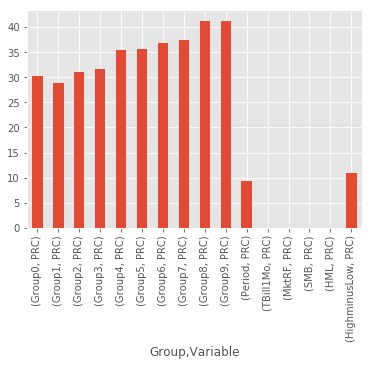

In [15]:
gsewrtPRC.xs(('PRC'),level='Variable', axis=1,drop_level=False).mean().plot(kind='bar')

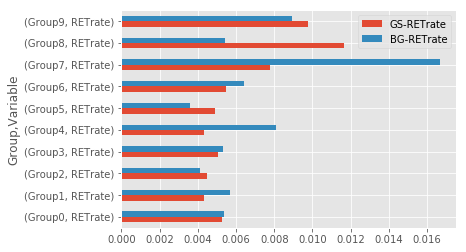

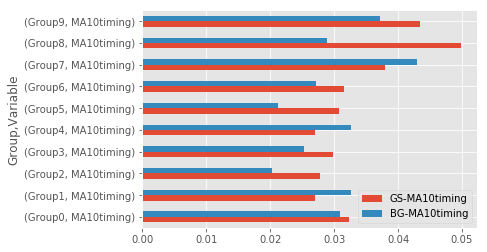

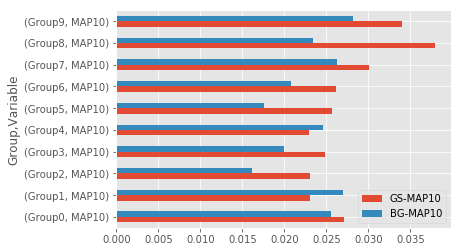

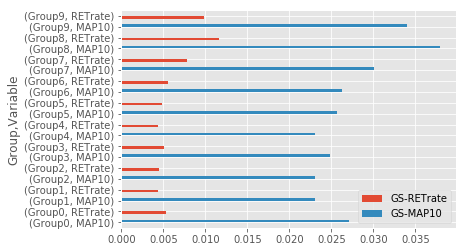

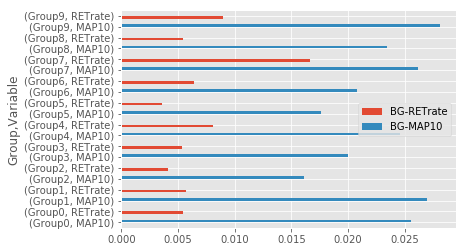

In [5]:
#gsewrtPRC.xs(('RETrate'),level='Variable', axis=1,drop_level=False).mean().plot()
#bgewrtPRC.xs(('RETrate'),level='Variable', axis=1,drop_level=False).mean().plot(kind='bar')
def printoutfigure(name,kind,gsewrtPRC,bgewrtPRC):
    pd.concat([gsewrtPRC.xs((name),level='Variable', axis=1,drop_level=False).mean(),bgewrtPRC.xs((name),level='Variable', axis=1,drop_level=False).mean()],axis=1,keys=['GS-%s'%name,'BG-%s'%name]).plot(kind=kind)
def printoutsomegroupfigure(name1,name2,kind,gsewrtPRC,symbol):
    pd.concat([gsewrtPRC.xs((name1),level='Variable', axis=1,drop_level=False).mean(),gsewrtPRC.xs((name2),level='Variable', axis=1,drop_level=False).mean()],axis=1,keys=['%s-%s'%(symbol,name1),'%s-%s'%(symbol,name2)]).plot(kind=kind)
printoutfigure('RETrate','barh',gsewrtPRC,bgewrtPRC)
plt.savefig('Histogram of BG on RET.png',dpi=1000)
printoutfigure('MA10timing','barh',gsewrtPRC,bgewrtPRC)
printoutfigure('MAP10','barh',gsewrtPRC,bgewrtPRC)
plt.savefig('Histogram of map10.png',dpi=1000)


printoutsomegroupfigure('RETrate','MAP10','barh',gsewrtPRC,'GS')
printoutsomegroupfigure('RETrate','MAP10','barh',bgewrtPRC,'BG')

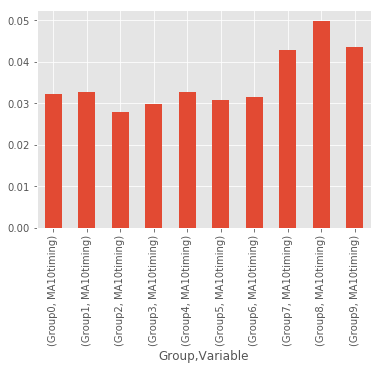

In [6]:
gsewrtPRC.xs(('MA10timing'),level='Variable', axis=1,drop_level=False).mean().plot(kind='bar')
bgewrtPRC.xs(('MA10timing'),level='Variable', axis=1,drop_level=False).mean().plot(kind='bar')

In [23]:
def hmlrecalue(col,bgvwrtPRC):
    ma_list = [5,10, 20,30,50, 60,100,200]


    if col ==('HighMinusLow','PRC'):
        if ('HighMinusLow','PRC') not in bgvwrtPRC.columns:
            bgvwrtPRC[('HighMinusLow','PRC')] =bgvwrtPRC[('Group9','PRC')] -bgvwrtPRC[('Group0','PRC')]
        else:
            pass
    else:
        pass
            
            
    bgvwrtPRC[(col[0],'RETrate')] = (bgvwrtPRC[col].diff()/bgvwrtPRC[col].shift(1))
    for ma in ma_list:
        bgvwrtPRC[(col[0],'MA_' + str(ma))] = bgvwrtPRC[col].rolling(window=ma,center=False).mean()
        temp = bgvwrtPRC[col] -bgvwrtPRC[col[0],'MA_'+str(ma)]
        bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)]=[1 if r>0 else 0 for r in temp]
        #GS[group[0],'MA%stiming'%ma] =GS[group[0],'RETrate'].shift(1)*GS[group[0],'buysignalforMA%s'%ma]+GS['TBill1Mo','PRC'].shift(1)*(1-GS[group[0],'buysignalforMA%s'%ma])
        bgvwrtPRC[col[0],'MA%stiming'%str(ma)] =bgvwrtPRC[col[0],'RETrate']*bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)]+bgvwrtPRC['TBill1Mo','PRC']*(1-bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)])
        bgvwrtPRC[col[0],'MAP%s'%str(ma)] =bgvwrtPRC[col[0],'MA%stiming'%str(ma)]-bgvwrtPRC[col[0],'RETrate']
        bgvwrtPRC[col[0],'MAP%s_dummy'%str(ma)] =[1 if n>0 else 0 for n in bgvwrtPRC[col[0],'MAP%s'%str(ma)]]
    return bgvwrtPRC

In [42]:
#bgewrtPRC=pd.read_hdf('regression_data_csv/result.h5','bgewrtPRC')
#bgvwrtPRC=pd.read_hdf('regression_data_csv/result.h5','bgvwrtPRC')
#gsewrtPRC=pd.read_hdf('regression_data_csv/result.h5','gsewrtPRC')
#gsvwrtPRC=pd.read_hdf('regression_data_csv/result.h5','gsvwrtPRC')
#xs(('HighMinusLow'),level='Variable', axis=1,drop_level=False).mean()

def sssss(col,bgvwrtPRC):
    ma_list = [5,10, 20,30,50, 60,100,200]


    bgvwrtPRC[(col[0],'RETrate')] = bgvwrtPRC[('Group9','RETrate')]-bgvwrtPRC[('Group0','RETrate')]
    for ma in ma_list:
            bgvwrtPRC[(col[0],'MA_' + str(ma))] = bgvwrtPRC[('Group9','MA_' + str(ma))]-bgvwrtPRC[('Group0','MA_' + str(ma))]
            #bgvwrtPRC[col[0],'buysignalforMA%s'%str(ma)]=bgvwrtPRC[('Group9','RETrate')]-bgvwrtPRC[('Group9','RETrate')]
            #GS[group[0],'MA%stiming'%ma] =GS[group[0],'RETrate'].shift(1)*GS[group[0],'buysignalforMA%s'%ma]+GS['TBill1Mo','PRC'].shift(1)*(1-GS[group[0],'buysignalforMA%s'%ma])
            bgvwrtPRC[col[0],'MA%stiming'%str(ma)] =bgvwrtPRC[('Group9','MA%stiming'%str(ma))]-bgvwrtPRC[('Group0','MA%stiming'%str(ma))]
            bgvwrtPRC[col[0],'MAP%s'%str(ma)] =bgvwrtPRC[('Group9','MAP%s'%str(ma))]-bgvwrtPRC[('Group0','MAP%s'%str(ma))]
            #bgvwrtPRC[col[0],'MAP%s_dummy'%str(ma)] =[1 if n>0 else 0 for n in bgvwrtPRC[col[0],'MAP%s'%str(ma)]]
    return bgvwrtPRC
bgewrtPRC =sssss(('HighMinusLow','PRC'),bgewrtPRC)
bgvwrtPRC =sssss(('HighMinusLow','PRC'),bgvwrtPRC)
gsewrtPRC =sssss(('HighMinusLow','PRC'),gsewrtPRC)
gsvwrtPRC =sssss(('HighMinusLow','PRC'),gsvwrtPRC)

In [168]:
rt =['vwrt','ewrt']
import collections
def altlaglength(gsewrtPRC,bgewrtPRC):
    targets =['MAP5','MAP10','MAP20','MAP50','MAP100','MAP200']
    MAP=collections.OrderedDict()
    for target in targets:
        col_name =[('HighMinusLow',target),('Group0',target),('Group1',target),('Group2',target),('Group3',target),('Group4',target),('Group5',target),('Group6',target),('Group7',target),('Group8',target),('Group9',target)]


        #target ='MAP10'
        GStestFF3={}
        GStestCAPM={}
        BGtestFF3={}
        BGtestCAPM={}
        BGtestFF3_var={}
        GStestFF3_var={}
        for group in col_name:
            #locals()['BG'+target+r ] = pd.merge(GSrealMAP[1],otherfactor,on='date')
            #locals()['GS'+target+r ] = pd.merge(BGrealMAP[1],otherfactor,on='date')
            CMDFF3 =[group]+[('MktRF','PRC') ,('SMB','PRC'), ('HML','PRC')]
            CMDCAPM =[group]+[('MktRF','PRC')]

            gsff3 =gsewrtPRC[CMDFF3]
            #gscapm=gsewrtPRC[CMDCAPM]
            bgff3 =bgewrtPRC[CMDFF3]
            #bgcapm=bgewrtPRC[CMDCAPM]
            gsff3 =gsff3.dropna()
            #gscapm=gscapm.dropna()
            bgff3 =bgff3.dropna()
            #bgcapm=bgcapm.dropna()

            CMDFF3 =[group[0],'MktRF','SMB','HML']
            CMDCAPM=[group[0],'MktRF']
            gsff3.columns =CMDFF3
            #[group[0],'MktRF','SMB','HML']
            gscapm.columns =CMDCAPM
            bgff3.columns =CMDFF3
            bgcapm.columns =CMDCAPM
            GStestFF3[group[0]] = sm.ols(formula='~'.join(CMDFF3[0:2])+'+'+"+".join(CMDFF3[2:]), data=gsff3).fit()
            #GStestFF3_var[group[0]] =GStestFF3[group[0]]
            GStestFF3_t =pd.concat([GStestFF3[group[0]].params,GStestFF3[group[0]].tvalues],axis=1)
            GStestFF3_t.columns =['%s-%s-params'%(group[0],target),'%s-%s-tvalues'%(group[0],target)]
            GStestFF3_var[group[0]]=GStestFF3_t

            
            GStestCAPM[group[0]] = sm.ols(formula='~'.join(CMDCAPM[0:2]), data=gsff3).fit()
            BGtestFF3[group[0]] = sm.ols(formula='~'.join(CMDFF3[0:2])+'+'+"+".join(CMDFF3[2:]), data=bgff3).fit()
            BGtestFF3_t =pd.concat([BGtestFF3[group[0]].params,BGtestFF3[group[0]].tvalues],axis=1)
            BGtestFF3_t.columns =['%s-%s-params'%(group[0],target),'%s-%s-tvalues'%(group[0],target)]
            BGtestFF3_var[group[0]]=BGtestFF3_t




            BGtestFF3_var[group[0]]=GStestFF3_t
            BGtestCAPM[group[0]] = sm.ols(formula='~'.join(CMDCAPM[0:2]), data=bgff3).fit()
        #MAP[target]=(GStestFF3,GStestCAPM,BGtestFF3,BGtestCAPM)
        MAP[target]=(GStestFF3_var,GStestCAPM,BGtestFF3_var,BGtestCAPM)
    return MAP
   


In [240]:
wt =bgewrtPRC.xs(('PRC'),level='Variable', axis=1,drop_level=False).dropna()

In [257]:
del bgewrtPRC[bgewrtPRC[('Group7','PRC')]>200]

TypeError: '[False False False ..., False False False]' is an invalid key

In [231]:
targets =['MAP5','MAP20','MAP50','MAP100','MAP200']
r =[]
print 'bg'
targets=['MAP10']
for target in targets:
    #target='MAP5'
    w =bgewrtPRC.xs((target),level='Variable', axis=1,drop_level=False).dropna()
    #pd.DataFrame(w.mean()).T
    col_name =['Group0','Group1','Group2','Group3','Group4','Group5','Group6','Group7','Group8','Group9','HighMinusLow']
    w.columns =col_name
    locals()['%s'%target] =pd.DataFrame([list(w.mean()),list(scipy.stats.ttest_1samp(w,0)[0])],columns =col_name, index =['%sMean'%target,'%sTvalue'%target]).T
    r.append(locals()['%s'%target])
pd.concat(r,axis=1)

bg


,MAP10Mean,MAP10Tvalue
Group0,0.025594,16.818325
Group1,0.026975,17.865398
Group2,0.016149,13.662976
Group3,0.019963,13.240612
Group4,0.024573,13.403176
Group5,0.017635,13.984963
Group6,0.020758,12.804048
Group7,0.026218,13.447045
Group8,0.023437,14.341112
Group9,0.028154,14.046792


In [224]:
targets =['MAP5','MAP20','MAP50','MAP100','MAP200']
r =[]
print 'gs'
#for target in targets:
target = 'MAP10'
t =altlaglength(bgewrtPRC,bgewrtPRC)[target][0]
print ' ff3 %s'%target
pd.concat(t.values(),axis=1).T

#params.update({key :value.params})
##tvalue.update({key :value.tvalues})
#pvalue.update({key :value.pvalues})


gs
 ff3 MAP10


,Intercept,MktRF,SMB,HML
Group5-MAP10-params,0.017901,-0.511532,-0.129693,0.005135
Group5-MAP10-tvalues,14.235877,-3.572231,-0.484829,0.018358
Group4-MAP10-params,0.024657,-0.181484,0.163547,0.072472
Group4-MAP10-tvalues,13.419707,-0.867378,0.418425,0.177323
Group7-MAP10-params,0.026646,-0.790355,-0.021218,-0.410276
Group7-MAP10-tvalues,13.708591,-3.570720,-0.051316,-0.948933
Group6-MAP10-params,0.021003,-0.553362,0.438155,0.452791
Group6-MAP10-tvalues,12.960341,-2.998572,1.270976,1.256113
Group1-MAP10-params,0.027369,-0.753057,0.159138,-0.242353
Group1-MAP10-tvalues,18.214233,-4.401039,0.497858,-0.725106


In [123]:
rt =['vwrt','ewrt']
target ='MAP10'
col_name =[('HighMinusLow',target),('Group0',target),('Group1',target),('Group2',target),('Group3',target),('Group4',target),('Group5',target),('Group6',target),('Group7',target),('Group8',target),('Group9',target)]

GStestFF3={}
GStestCAPM={}
BGtestFF3={}
BGtestCAPM={}
for group in col_name:
    #locals()['BG'+target+r ] = pd.merge(GSrealMAP[1],otherfactor,on='date')
    #locals()['GS'+target+r ] = pd.merge(BGrealMAP[1],otherfactor,on='date')
    CMDFF3 =[group]+[('MktRF','PRC') ,('SMB','PRC'), ('HML','PRC')]
    CMDCAPM =[group]+[('MktRF','PRC')]
    
    gsff3 =gsewrtPRC[CMDFF3]
    #gscapm=gsewrtPRC[CMDCAPM]
    bgff3 =bgewrtPRC[CMDFF3]
    #bgcapm=bgewrtPRC[CMDCAPM]
    gsff3 =gsff3.dropna()
    #gscapm=gscapm.dropna()
    bgff3 =bgff3.dropna()
    #bgcapm=bgcapm.dropna()
    
    CMDFF3 =[group[0],'MktRF','SMB','HML']
    CMDCAPM=[group[0],'MktRF']
    gsff3.columns =CMDFF3
    #[group[0],'MktRF','SMB','HML']
    #gscapm.columns =CMDCAPM
    bgff3.columns =CMDFF3
    #bgcapm.columns =CMDCAPM
    GStestFF3[group] = sm.ols(formula='~'.join(CMDFF3[0:2])+'+'+"+".join(CMDFF3[2:]), data=gsff3).fit()
    GStestCAPM[group] = sm.ols(formula='~'.join(CMDCAPM[0:2]), data=gsff3).fit()
    BGtestFF3[group] = sm.ols(formula='~'.join(CMDFF3[0:2])+'+'+"+".join(CMDFF3[2:]), data=bgff3).fit()
    BGtestCAPM[group] = sm.ols(formula='~'.join(CMDCAPM[0:2]), data=bgff3).fit()
   
   

In [128]:
#ReturnPTandParams(GStestCAPM,'CAPM')


test =gsewrtPRC[[('HighMinusLow','MAP10'),('MktRF','PRC'),('SMB','PRC'), ('HML','PRC')]].dropna()
test.columns =['HighMinusLow','MktRF','SMB','HML']
adftest(gsewrtPRC[('Group0','MAP10')].dropna(),printout =True,regression ='nc')
# {‘c’,’ct’,’ctt’,’nc’}


#sm.ols(formula='HighMinusLow~MktRF+SMB+HML', data=test).fit().summary()
sm.ols(formula='HighMinusLow~MktRF', data=test).fit().summary()


#plot(gscapm)

#gsewrtPRC.xs(('MA10timing'),level='Variable', axis=1,drop_level=False)

ADF Statistic: -2.582105
p-value: 0.009512
Critical Values:
	5%: -1.941
	1%: -2.566
	10%: -1.617
Statistical Stationary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HighMinusLow   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4340
Date:                Tue, 05 Sep 2017   Prob (F-statistic):              0.510
Time:                        23:16:06   Log-Likelihood:                 2668.3
No. Observations:                3244   AIC:                            -5333.
Df Residuals:                    3242   BIC:                            -5320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0069      0.002      3.710      0.000       0.003       0.011
MktRF         -0.1035      0.157     -0.659      0.510      -0.411       0.205
==============================================================================
Omnibus:                      129.963   Durbin-Watson:                   2.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.281
Skew:                           0.342   Prob(JB):                     1.79e-47
Kurtosis:                       4.060   Cond. No.                         84.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
ReturnPTandParams(GStestFF3,'FF3').to_csv('gsff3.csv')
ReturnPTandParams(GStestCAPM,'CAPM').to_csv('gscapm.csv')
ReturnPTandParams(BGtestFF3,'FF3').to_csv('bgff3.csv')
ReturnPTandParams(BGtestCAPM,'CAPM').to_csv('bgcapm.csv')

In [104]:
def ReturnPTandParams(GStestFF3,Model_name):
    params={}
    tvalue={}
    pvalue={}
    for key,value in GStestFF3.items():
        params.update({key :value.params})
        tvalue.update({key :value.tvalues})
        pvalue.update({key :value.pvalues})
    params,pvalue,tvalue =pd.DataFrame(params).T,pd.DataFrame(pvalue).T,pd.DataFrame(tvalue).T 
    return pd.concat([RenameColumns(params,'the (%s)Coeff of'%Model_name),RenameColumns(tvalue,'T value of'),RenameColumns(pvalue,'pvalue of the tvalue of'),RenameColumns(ReturnADJR2andFpvalue(GStestFF3),0)],axis=1)

#BGMAP_10['df_vwrt']
def CalculateSuccessRate(BGMAP_10):
    BG_test_postive =np.sign(BGMAP_10['df_vwrt'].set_index('date'))>0

    BGSuccessRate =pd.DataFrame(BG_test_postive.describe().T['freq']/BG_test_postive.describe().T['count'])
    BGSuccessRate.columns=['SuccessRate']
    return pd.concat([BGMAP_10['vwrt'],BGSuccessRate],axis=1)
    #return BGSuccessRate


def RenameColumns(df,name):
    if isinstance(name ,list) or isinstance(name ,set) or isinstance(name ,tuple):
        df.columns =name
    elif isinstance(name,str):
        if name in df.columns[0]:
            pass
        else:
            df.columns=[name +col for col in df.columns]
    else:
        pass
    return df
            
def ReturnADJR2andFpvalue(GStestCAPM):
    adjr={}
    for group,result in GStestCAPM.items():
        adjr[group]=(result.rsquared_adj,result.f_pvalue)
    return pd.DataFrame(adjr,index=['Adj_R2','f_pvalue']).T
#dir(BGtestCAPM['Group_0'])
def adftest(series_test,printout=False,regression='ctt'):
    X = series_test.values
    result = adfuller(X,regression=regression)
    if printout !=False:
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        if result[1] <0.05:
            print "Statistical Stationary"
        else:
            print "Non-Stationary"
    else:
        pass
    return (result[0],result[1])